## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [8]:
# read data
ab_df = pd.read_csv('ab_data.csv')
ab_df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


b. Use the below cell to find the number of rows in the dataset.

In [14]:
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
ab_df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [13]:
ab_df.user_id.nunique()

290584

d. The proportion of users converted.

In [22]:
# proportions of user who converted (i.e. converted = 1)
ab_df[ab_df.converted == 1].user_id.count()/ab_df.shape[0]

# alternatively
ab_df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.
    

In [26]:
# adding these two will give total misalignment

ab_df[(ab_df.landing_page == 'new_page') & (ab_df.group != 'treatment')].user_id.count() +\
ab_df[(ab_df.landing_page != 'new_page') & (ab_df.group == 'treatment')].user_id.count()

3893

f. Do any of the rows have missing values?

In [32]:
ab_df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [34]:
df2 = ab_df.drop(ab_df[((ab_df.landing_page == 'new_page') & (ab_df.group != 'treatment')) |
                       ((ab_df.landing_page != 'new_page') & (ab_df.group == 'treatment'))].index)

In [35]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [39]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [40]:
# check duplicate user_id, but we show both of those in our result by keep=False
df2.user_id[df2.user_id.duplicated(keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [41]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [42]:
# removing by index, removing last entry and keep the first oneby unique column timestamp
df2 = df2[df2.timestamp != '2017-01-09 05:37:58.781806']

In [45]:
df2.user_id.nunique()

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [46]:
df2.converted.mean()


0.11959708724499628

In [50]:
#df2.describe().loc['mean'].converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [51]:
df2.converted[df2.group == 'control'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [52]:
df2.converted[df2.group == 'treatment'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [53]:
df2[df2.landing_page == 'new_page'].count()/df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Answer :** 

    It appears that individuals in the treatment group had a conversion rate of 11.88% and individuals in the control group had a conversion rate of 12.04%.
        
    Given the probability that an individual received the new page is 0.50006,suggests that there is an equal chance that an individual received the old page at the same time.
        
    Besides, the probability of conversion from control group and treatment group is almost similar. Just different at 3rd decimal point.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer :**

**Null Hypothesis: The probability of old page better than new page is greater or equal to probability of new page.**

**Alternative Hypothesis: The probability of new page being better than new page is less than that of a new page.**
    


Null Hypotheses:  **$p_{old}$** is equal greater or equal to  **$p_{new}$**

Alternative Hypothesis:  **$p_{old}$** is less than **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [54]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [55]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [57]:
#n_new is the no. of user in the new page
n_new = df2[df2.group == 'treatment'].count()[0]
n_new

145310

d. What is $n_{old}$?

In [58]:
#n_new is the no. of user in the old page
n_old = df2[df2.group == 'control'].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [59]:
# simulating n_new transaction that have probabiliy of receiving new page,
# using binomial gives the outout as the number of 1's
new_page_converted = np.random.binomial(1,p_new,n_new) 
new_page_converted.mean()

0.11814052714885417

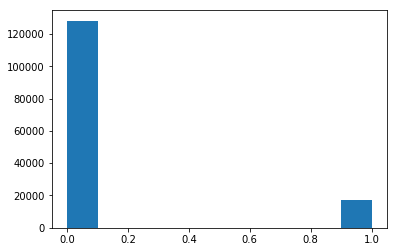

In [60]:
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [61]:
# simulating n_new transaction that have probabiliy of having old page, 
# using binomial gives the outout as the number of 1's
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.1200008260253039

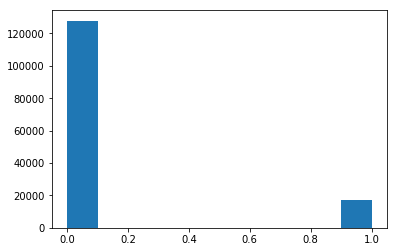

In [62]:
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [64]:
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old

-0.0018602988764497286

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [98]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new)  # bootstrapping
    old_page_converted = np.random.binomial(1,p_old,n_old) 
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [99]:
# convert p_diffs to numpy array for array based computations in the future
p_diffs = np.array(p_diffs)

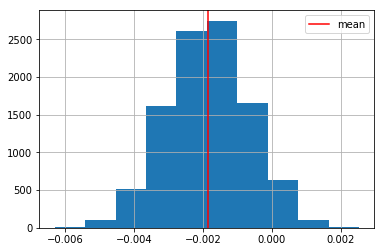

In [100]:
plt.grid()
plt.hist(p_diffs)
plt.axvline(p_diffs.mean(), color='r', label='mean')
plt.legend()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [101]:
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs).mean()

0.4122

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer :**

The proportion of the p_diffs that are greater than the actual difference observed in ab_data.csv is called the **p-value**

A p-value is the probability of observing your statistic if the null hypothesis is true.

The null hypothesis was that the difference in means would be equal or less than 0, and the alternative was the difference would be greater than 0. However, In our case the p-value is so big that we can confidently say that **we fail to reject null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [102]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].converted.count()
n_new = df2[df2.group == 'treatment'].converted.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [103]:
# based upon the documentation
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

- **A z-score represents how many standard deviations away our data point is from the mean**
- The conversion rate of the new landing page is only 1.3109 standard deviations from the conversion rate of the old landing page. This is less than the critical value of 1.96. We cannot reject the hull hypothesis that the difference between the two conversion rates is no different from zero.
- Also the P-value is 0.9050.
- With this computation, we can confidently say **we fail to reject null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer :**

In statistics, linear regression is a linear approach for modelling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X.
This is a case of **Logistic Regression**. In this scenario, we want to predict something that has only two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [104]:
# add an intercept
df2['intercept'] = 1

In [105]:
# using pd.get_dummies to convert the 'landing_page' and 'group' to 1s and 0s
df2[['landing_page_new', 'landing_page_old']] = pd.get_dummies(df2['landing_page'])
df2[['ab_page_control','ab_page_treatment']] = pd.get_dummies(df2['group'])

In [106]:
# here, we will use landing_page_old and ab_page_control as our baselines, therefore remove those
df2.drop(['landing_page_old','ab_page_control'], axis=1, inplace=True)

In [111]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [113]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page_treatment']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [114]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        18:52:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page_treatment    -0.0150      0.011     -1.311      0.190      -0.037       0.007
=====================================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer :**
       
       The p-value associated with ab_page is 0.1899
 
- In Part II, the p-value was calculated where the null hypothesis was that the new page would convert more than the old page, and the alternative was the old page converted more than or equal to the new page.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [138]:
# duration of the experiment
duration = np.array(pd.to_datetime(ab_df.timestamp).sort_values(ascending=True))
td = duration[-1] - duration[0]
days = td.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

21.0

**Answer :**
- It would be a good idea to consider other factors to add into the regression model.
- Perhaps The duration of this experiment was 21 days. Too short, it would be advisable to increase the duration
- The disadvantage is it adds complexity, because variables may affect other variables. Also, some variables may not affect the outcome.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [115]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [116]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1


In [126]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [128]:
# Create the necessary dummy variables
df_new[['canada','uk','us']] = pd.get_dummies(df_new['country'])

In [132]:
# let's consider US being our baseline, therefore, we drop US
df_new.drop(['us'], axis=1, inplace=True)

In [133]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment,canada,uk
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [134]:
### Fit Your Linear Model And Obtain the Results
# fitting linear model
df_new['intercept'] = 1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','canada','uk']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [135]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        19:04:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
canada        -0.0408      0.027     -1.518      0.129      -0.093       0.012
uk             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**THe P value of ab Page is 1.984**

In [136]:
1/np.exp(-0.0408), np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)


**Above results can be read as:**

- users from uk are 1.0099 times more likely to convert as compared to users from US
- users from canada are 1.0416 times more likely to less convert as compared to users from US

<a id='conclusions'></a>
### Conclusions

Within the framework this project, we tried to understand whether the company should implement a new page or keep the old page with following:

- Probability based approach
- A/B test
- Regression approach

**Probability based approach:**

- We found that probability of an individual receiving the new page is 0.5006
- Meaning, there is almost the same chance that an individual received the old page

**A/B test:**

- In A/B test we set up our hypothesis to test if new page results in better conversion or not
- We simulated our user groups with respect to conversions
- We found the p_value to be 0.4122
- With such a p-value, we failed to reject null hypothesis
- By using the built-in stats.proportions_ztest we computed z-score and p-value which confirmed our earlier p-value and failure to reject null hypothesis


**Regression Approach:**

- We looked at exploring two possible outcomes. Whether new page is better or not.
- With logistic regression results, we again encountered same z-score as well as p-value of 0.190, corresponding two-tailed case
- By further adding geographic location of the users, we tried to find if any specific country had an impact on conversion
- The result gave a similar outlook and suggested that the countries have no impact on the conversion rate.

